<a href="https://colab.research.google.com/github/Vanshika-goyal1/VGG19_Deep-Learning/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [8]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout,BatchNormalization,Activation

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score

In [9]:
pip install split-folders[full]

In [10]:
import splitfolders
input_folder = '/content/drive/MyDrive/Colab Notebooks/train'
splitfolders.ratio(input_folder,output = "dataset" ,
                   seed = 1337,ratio = (0.7,0.2,0.1),
                   group_prefix = None
                   )

Copying files: 2800 files [01:14, 37.84 files/s] 


**Defining data paths**

In [11]:
 train_path = '/content/dataset/train'
 test_path = '/content/dataset/test'
 val_path = '/content/dataset/val'

**Converting image to pixels**

In [12]:
def imagearray(path,size):
  data = []
  for folder in os.listdir(path):
    sub_path = os.path.join(path, folder)

    for img in os.listdir(sub_path):
      image_path = os.path.join(sub_path, img)
      img = cv2.imread(image_path)
      img = cv2.resize(img,size)
      data.append(img)
  return data

In [13]:
size = (224,224)
train_data = imagearray(train_path,size)
test_data = imagearray(test_path,size)
val_data = imagearray(val_path,size)

# **Normalization**

In [14]:
train_data = np.array(train_data)
test_data = np.array(test_data)
val_data = np.array(val_data)

In [15]:
x_train = train_data/255
x_test = test_data/255
x_val = val_data/255

# **Defining target variables**

In [16]:
def data_class(data_path,size,class_mode):
  datagen = ImageDataGenerator(rescale=1./255)
  classes = datagen.flow_from_directory(data_path,
                                        target_size=size,
                                        batch_size=32,
                                        class_mode=class_mode,
                                        )
  return classes

In [17]:
train_class = data_class(train_path,size,'sparse')
test_class = data_class(test_path,size,'sparse')
val_class = data_class(val_path,size,'sparse')

Found 1958 images belonging to 2 classes.
Found 282 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [18]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [19]:
train_class.class_indices

{'Closed_Eyes': 0, 'Open_Eyes': 1}

In [20]:
y_train.shape,y_test.shape,y_val.shape

((1958,), (282,), (560,))

# **VGG19 Model**

In [21]:
vgg=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

80134624/80134624 [==============================] - 3s 0us/step


In [22]:
for layers in vgg.layers:
  layers.trainable=False

In [23]:
x=Flatten()(vgg.output)
prediction=Dense(3,activation='softmax')(x)

In [24]:
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

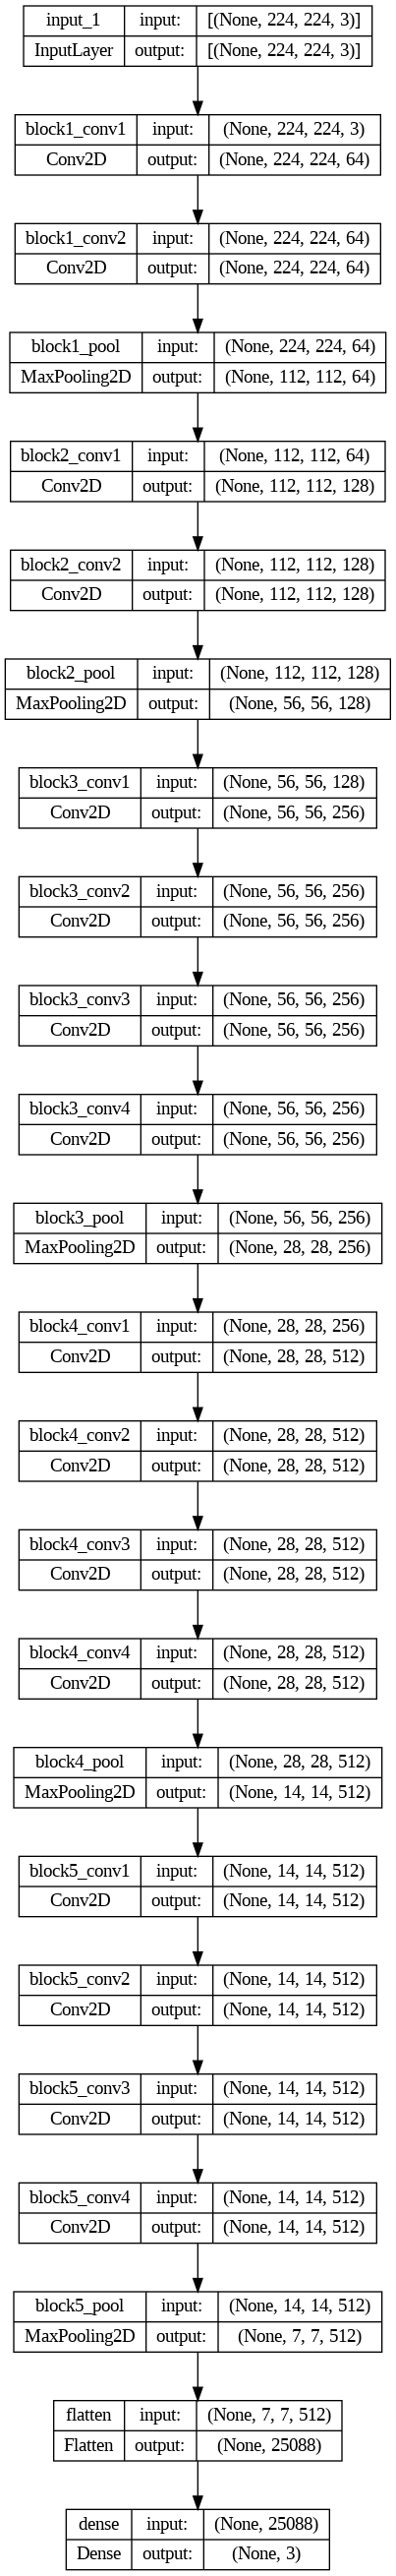

In [25]:
 plot_model(model=model,show_shapes=True)

In [26]:
early_stop=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='min')

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,
          epochs=5,
          validation_data=(x_val,y_val),
          callbacks=[early_stop],
          batch_size=30,
          shuffle=True)

Epoch 1/5
66/66 [==============================] - 2095s 32s/step - loss: 0.4532 - accuracy: 0.8218 - val_loss: 0.2425 - val_accuracy: 0.9179
Epoch 2/5
66/66 [==============================] - 1992s 30s/step - loss: 0.2275 - accuracy: 0.9285 - val_loss: 0.2169 - val_accuracy: 0.9321
Epoch 3/5
66/66 [==============================] - 1977s 30s/step - loss: 0.1921 - accuracy: 0.9433 - val_loss: 0.2108 - val_accuracy: 0.9321
Epoch 4/5
66/66 [==============================] - 1984s 30s/step - loss: 0.1708 - accuracy: 0.9464 - val_loss: 0.1898 - val_accuracy: 0.9339
Epoch 5/5
66/66 [==============================] - 1996s 30s/step - loss: 0.1742 - accuracy: 0.9525 - val_loss: 0.1513 - val_accuracy: 0.9482
